# Tratamiento de imágenes - Trabajos prácticos
# Práctico 2 - Mejoramiento y Restauración

La imagen I tiene tamaño:(266, 400)


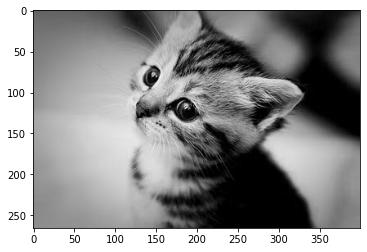

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import cv2 #opencv
import random

%matplotlib inline

filenames = ['./imagenes/kitten.jpg']

I = cv2.imread(filenames[0])
I=I[:,:,0]
print("La imagen I tiene tamaño:" + str(I.shape))

# mostrar mediante pyplot
plt.imshow(I,cmap="gray")


### 1)	Difusión

a)	Implementar filtros de media y de mediana

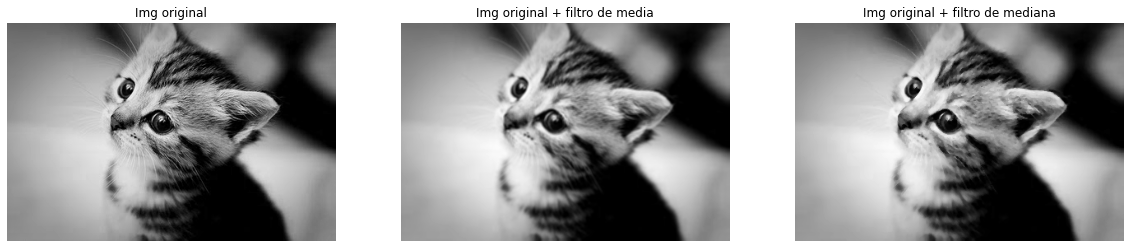

In [16]:
def meanFilter(I, filterSize):
    """filtro de media

    Args:
        I (img): la imagen
        filterSize (int):radio (tiene que ser impar)

    Returns:
        img: la imagen filtrada
    """
    I= np.pad(I,filterSize,'reflect')

    J=I.copy()
    height, width = np.shape(I)
    for fila in range(0,height-filterSize*2+1):
            for col in range(0,width-filterSize*2+1):
                square = I[fila:fila+filterSize*2+1, col:col+filterSize*2+1]
                mean=int(np.mean(square))
                J[fila,col]=mean
                
    return(J[filterSize:-filterSize,filterSize:-filterSize])
   
    

def medianFilter(I, filterSize):
    
    """filtro de mediana

    Args:
        I (img): la imagen
        filterSize (int):radio (tiene que ser impar)

    Returns:
        img: la imagen filtrada
    """
    I= np.pad(I,filterSize,'reflect')

    J=I.copy()
    height, width = np.shape(I)
    for fila in range(0,height-filterSize*2+1):
            for col in range(0,width-filterSize*2+1):
                square = I[fila:fila+filterSize*2+1, col:col+filterSize*2+1]
                mean=int(np.median(square))
                J[fila,col]=mean
                
    return(J[filterSize:-filterSize,filterSize:-filterSize])
    
    return J

pixels = np.array([[10, 70,250,200], [150, 90,36,44],[10, 70,250,200], [150, 90,36,44]])
#print(pixels)
J=meanFilter(I, 1)
K=medianFilter(I, 1)
#print(J)

fig, axs = plt.subplots(1,3,figsize=(20,20))


axs[0].imshow(I,cmap="gray")
axs[1].imshow(J,cmap="gray")
axs[2].imshow(K,cmap="gray")
axs[0].set_axis_off()
axs[0].set_title("Img original")
axs[1].set_axis_off()
axs[1].set_title("Img original + filtro de media")
axs[2].set_axis_off()
axs[2].set_title("Img original + filtro de mediana")

plt.show()




b)	Implementar difusión isotrópica y anisotrópica de una imagen usando EDP

In [17]:
def difusionIsotropica(I,step, numIters):
    
    # IMPLEMENTAR
    
    return J

def difusionAnisotropica(I,lambdaDiscretizacion, sigmaDetector, numIters):
    
    # IMPLEMENTAR
    
    return J

c)	Aplicar y comparar

### 2)	Imágenes borrosas
a)	A partir de una imagen original generar imágenes borrosas (filtrando con núcleos gaussianos o discos circulares por ejemplo)

b)	Mejorar imágenes borrosas corriendo la ecuación del calor hacia atrás (difusión isotrópica implementada en (1.b) con paso de tiempo negativo)
Ver el resultado para diversos pasos y tiempos de evolución.

### 3) Restauración de imágenes con ruido

a) A partir de una imagen original, generar imágenes con diferentes niveles de ruido gaussiano (por ejemplo σ=5, 10, 20, 40) y ruido “sal y pimienta” (por ejemplo p=0.1, 0.3, 0.5, 0.8).
 
Algunas [imágenes estándar](http://en.wikipedia.org/wiki/Standard_test_image) se pueden encontrar en http://sipi.usc.edu/database/database.php?volume=misc    
	

In [18]:
def addGaussianNoise(I,sigma):
    shape=np.shape(I)
    gaussian = np.random.normal(0, sigma, shape)
    J=I+gaussian
    
    return J

def addSaltPepperNoise(I,p):
    J=I.copy()
    opciones = [0, 1,2]
    pesos = [1-p, p/2,p/2]
    for i in range(np.shape(I)[0]):
        for j in range(np.shape(I)[1]):
            resultado = random.choices(opciones, pesos,k=1)
            if resultado[0]==1:
                #pepper
                J[i,j]=0
            elif resultado[0]==2:
                #salt
                J[i,j]=255
    
    return J

b) Procesar las imágenes de la parte (a) con filtros de media y de mediana para reducir el ruido.

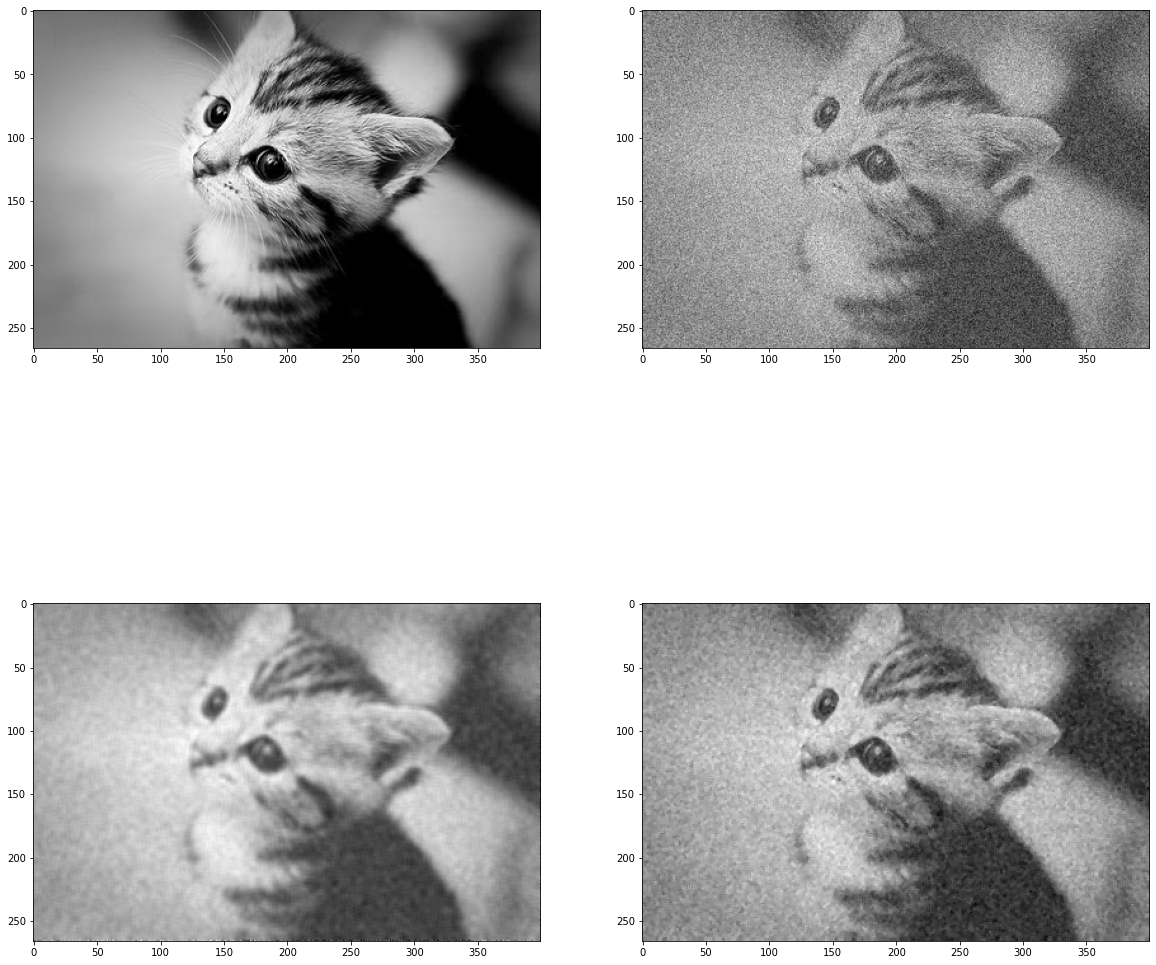

In [19]:
I = imread('imagenes/kitten.jpg')
if I.ndim>2:
    I = I[:,:,0]
J=addGaussianNoise(I,40)
K=meanFilter(J, 2)
L=medianFilter(J, 1)
fig, axs = plt.subplots(2,2,figsize=(20,20))

axs[0,0].imshow(I,cmap="gray")
axs[0,1].imshow(J,cmap="gray")
axs[1,0].imshow(K,cmap="gray")
axs[1,1].imshow(L,cmap="gray")



[[ 75.66916395 149.71131652  54.39054939 ... 111.3384043    2.01157247
   78.25255151]
 [113.1868044   71.45115697  87.24303965 ...  69.38766497  65.38514095
   28.74601449]
 [140.36661489 169.75376351  87.63339241 ... -34.37121322   3.56713056
  134.29605419]
 ...
 [138.19457571 112.96908175 136.5350116  ... 121.89413597 108.49392058
  112.11296884]
 [ 97.37541776  91.63450703 154.72585337 ...  87.99298709  53.66005113
  119.11299577]
 [ 97.98607087  40.59563875 141.14627784 ... 121.01845591  73.4337188
   72.7368728 ]]
[  442.   673.   930.  1153.  1358.  1575.  1829.  2074.  2324.  2559.
  2799.  3027.  3242.  3486.  3739.  3968.  4232.  4482.  4738.  4988.
  5250.  5512.  5767.  6013.  6288.  6559.  6817.  7070.  7314.  7584.
  7852.  8125.  8402.  8670.  8914.  9198.  9440.  9696.  9957. 10253.
 10580. 10843. 11149. 11417. 11706. 11988. 12252. 12518. 12775. 13063.
 13383. 13649. 13951. 14233. 14531. 14840. 15144. 15447. 15771. 16084.
 16400. 16703. 16996. 17298. 17601. 17906. 1821

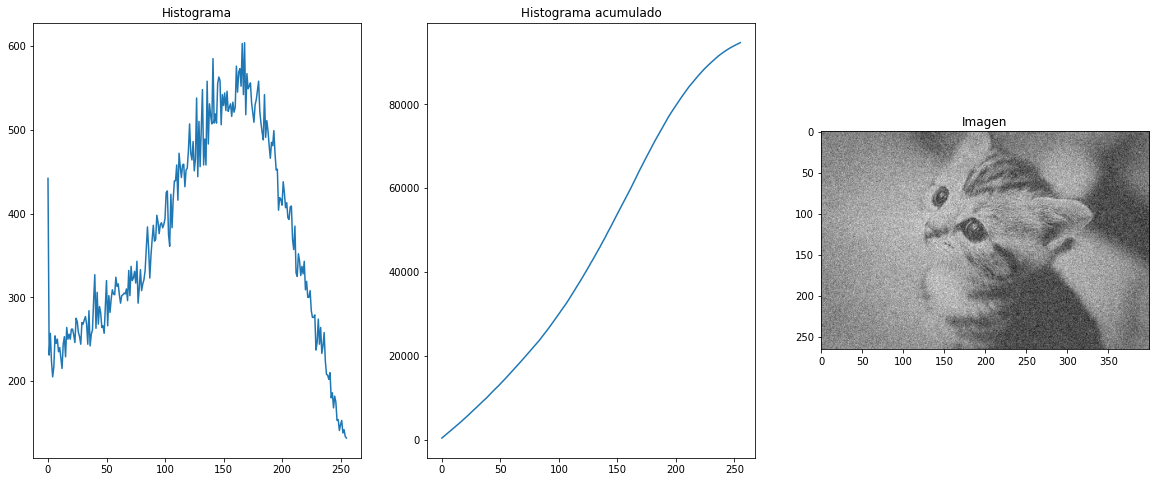

In [20]:
def histrograma(I, nBins):
    I=I.astype(int)
    histograma_ac = np.zeros(nBins)
    histograma = np.zeros(nBins)

    suma=0
    for i in range(256):
        
        count = np.count_nonzero(I == i)
        suma=suma + count
        histograma_ac[i]=suma
        histograma[i]=count
        
    
    X_min_ac = min(histograma_ac)
    X_max_ac = max(histograma_ac)
    print(histograma_ac)
    #print(histograma_ac)
    #histograma_ac_norm = [int((x - X_min_ac) * (255 / (X_max_ac - X_min_ac))) for x in histograma_ac]

    return histograma, histograma_ac

x=np.arange(0, 256, 1)
print(J)
histograma, histograma_ac=histrograma(J, 256)


fig, axs = plt.subplots(1,3,figsize=(20,8))


axs[0].plot(x, histograma)
axs[1].plot(x, histograma_ac)
axs[2].imshow(J,cmap="gray")

axs[0].set_title("Histograma")
axs[1].set_title("Histograma acumulado")
axs[2].set_title("Imagen")

plt.show()


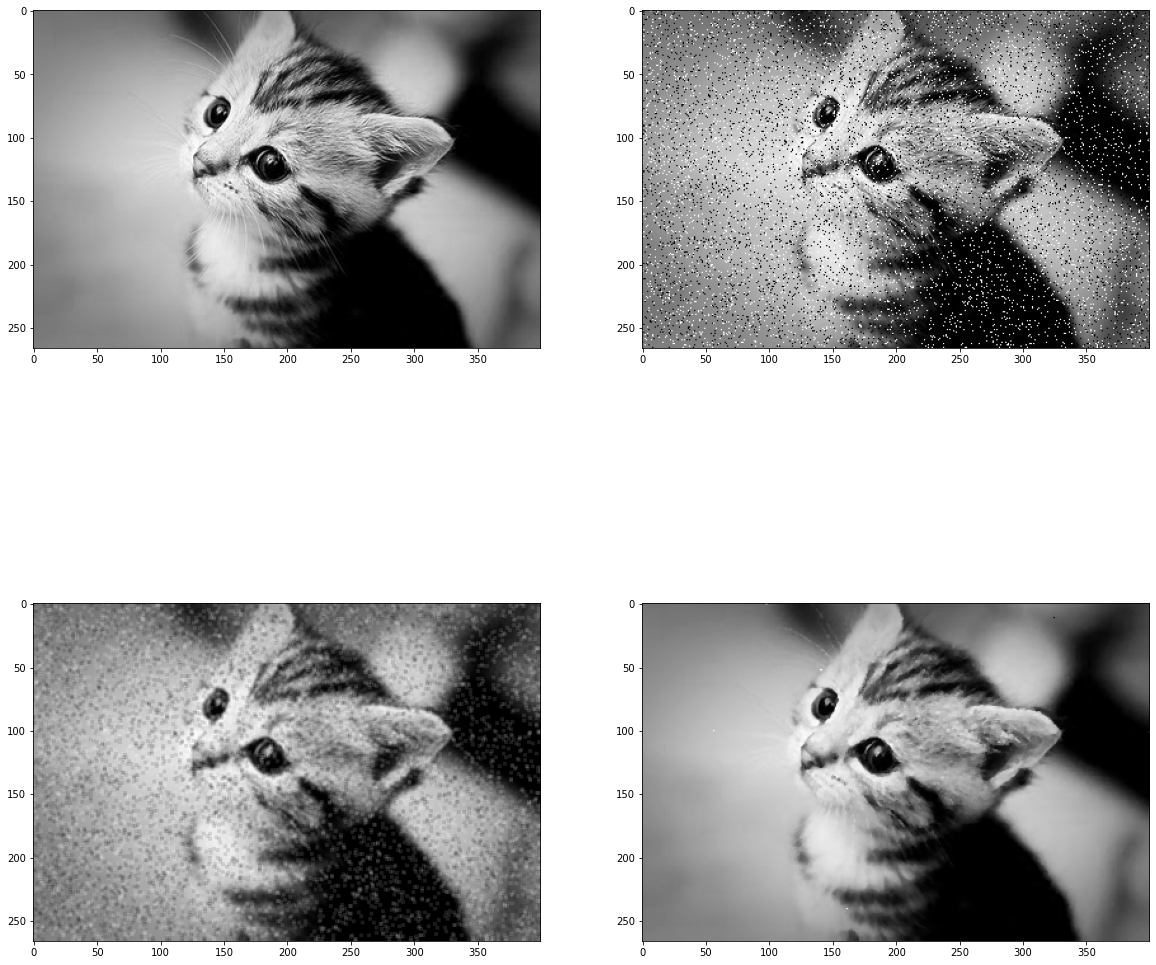

In [21]:
I = imread('imagenes/kitten.jpg')
if I.ndim>2:
    I = I[:,:,0]
J=addSaltPepperNoise(I,0.1)
K=meanFilter(J, 1)
L=medianFilter(J, 1)
fig, axs = plt.subplots(2,2,figsize=(20,20))


axs[0,0].imshow(I,cmap="gray")
axs[0,1].imshow(J,cmap="gray")
axs[1,0].imshow(K,cmap="gray")
axs[1,1].imshow(L,cmap="gray")

c) Analizar cualitativamente los resultados

Respuesta:  ...

d) Cuantificar la reducción de ruido utilizando medidas adecuadas (PSNR, RMSE, etc,). Para ello:

* Implementar en código
* En Fiji con el [plugin SNR](http://bigwww.epfl.ch/sage/soft/snr/) 
    * Nota: descargar el SNR_.jar y moverlo en la carpeta "plugins" (sin descomprimir)
    
Corroborar que den números similares tanto la implementación como el plugin de Fiji.

In [22]:
def PSNR(I,Iruidosa):
    
    # IMPLEMENTAR
    
    return PSNR

def RMSE(I,Iruidosa):
    
    # IMPLEMENTAR
    
    return np.sqrt(MSE)


e) Analizar los resultados teniendo en cuenta las características de la señal y del ruido en cada caso.

### 4) Restauración de imágenes con ruido – Algoritmo “Non local means”

a) Explicar en qué consiste el algoritmo y cuál es el principio en el que se basa

Respuesta: ...

b) Probar sobre imágenes con diversos niveles de ruido gaussiano y “sal y pimienta”. Se sugiere utilizar la implementación disonible en [IPOL](http://www.ipol.im/pub/art/2011/bcm_nlm/) o la que se encuentra en el módulo restoration del paquete skimage.

c) Comentar resultados en distintas zonas de la imagen

Respuesta:  ...

d) Comparar con resultados obtenidos en (3)

Respuesta: ...

e) (Opcional) Probar otros métodos de reducción de ruido disponibles en el módulo restoration de skimage (bilateral, total-variation, wavelet). ¿En qué casos los resultados son mejores qué las técnicas anteriormente evaluadas?

##  Mejoramiento y Restauración / Transformada de Fourier

### 5) 	Filtrado en el espacio y en frecuencia

a)	Considere los operadores que aproximan el gradiente (ej. Prewitt,  Sobel)
*	Exprese los operadores direccionales
*	Determine el filtro equivalente en frecuencia H(u,v). Explique qué tipo de filtro es (pasabajo, pasaalto, pasabanda). 
*	Realice el filtrado de una imagen en el espacio y en frecuencia. Para ello utilice el método convolve disponible en el paquete ndimage de scipy.
* Verifique que el resultado obtenido es similar al de aplicar los filtros sobel y prewitt disponibles en el mismo paquete 

In [23]:
# Funciones para fft 2D y convolución 2D
from scipy.fftpack import fft2, ifft2, fftshift
from scipy.ndimage import convolve

b)	Laplaciano
*	Explique cómo se deriva un operador discreto 3x3 que aproxime el operador Laplaciano 
*	Muestre las características del Laplaciano en el espacio y en frecuencia.
*	Muestre la utilidad en el mejoramiento de imágenes (“sharpening”)  y en la detección de bordes de imágenes.

### 6) Movimiento lineal uniforme 

a) Ver PSF y MTF del movimiento lineal uniforme (se prové una función que calcula la PSF a partir del largo y el ángulo del movimiento)

In [56]:
from skimage import transform
import numpy as np

def motionPSF(largo=9,angulo=0, sz=65):
    # Se genera una imagen cuadrada de lado sz y se pinta una linea horizontal 
    # en el medio de la imagen de tamaño igual al largo
    f = np.zeros((sz,sz)) 
    f[sz // 2, sz // 2 - largo//2 : sz // 2 + largo//2 + 1]=1  
    # Luego se rota el angulo especificado
    f = transform.rotate(f,angulo);
    # Finalmente se normaliza
    f = f/np.sum(f);
    return f

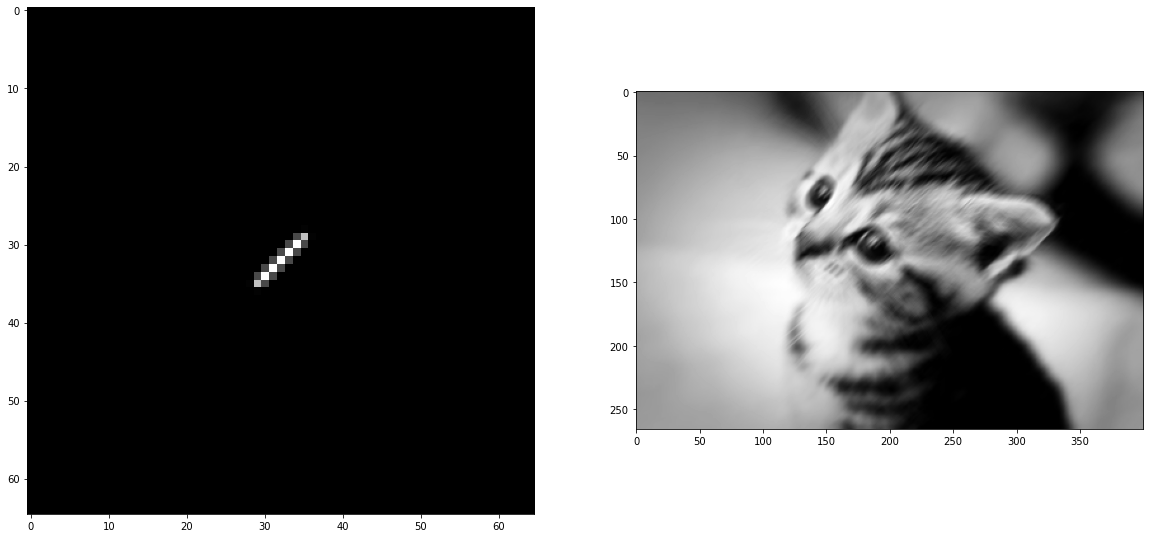

In [57]:
A = motionPSF(9, 45)
I = cv2.imread('imagenes/kitten.jpg')
I=I[:,:,0]
I_conv=convolve(I,A)

fig, axs = plt.subplots(1,2,figsize=(20,20))


axs[0].imshow(A,cmap="gray")
axs[1].imshow(I_conv,cmap="gray")
# mostrar mediante pyplot



b) Dada una imagen afectada de movimiento lineal uniforme y ruido, ver espectro de imagen original, ruido e imagen degradada

In [93]:
def MoverImagen(I,largo,angulo):
    sz=65
    espectro_I_movida=fft2(I)
    #espectro_I_movida= fftshift(espectro_I_movida)

    psf=motionPSF(largo=largo,angulo=angulo)

    di=-sz/2
    dj=-sz/2
    [iF,jF]=np.meshgrid(np.arange(0,I.shape[0]),np.arange(0,I.shape[1]),indexing='ij')
    transl_F=np.exp(-1j*2*np.pi*(iF*di/I.shape[0]+jF*dj/I.shape[1]))
    mtf=fft2(psf,I.shape)*transl_F
    #mtf=fftshift(mtf)
    I_deg_fft=espectro_I_movida*mtf

    I_deg=np.abs(ifft2(I_deg_fft))
    
    return I_deg
I_movida=MoverImagen(I,9, 45)



In [94]:
espectro_I=fft2(I)
espectro_I=fftshift(espectro_I)
espectro_I_movida=fft2(I_conv)
espectro_I_movida=fftshift(espectro_I_movida)

c) Intentar restaurar mediante:
* Filtrado inverso
* Filtrado pseudo inverso
* Filtrado de Wiener (usar la función “wiener” del paquete skimage.restoration con diversos parámetros)

In [95]:
def filtrado_inverso(I_movida,h,sz=65):
    """Hace el filtrado con 1/H

    Args:
        I_movida (ndarray): imagen a restaurar
        h (ndarray):PSF
    """
    espectro_I_movida=fft2(I_movida)
    #espectro_I_movida=fftshift(espectro_I_movida)
    H=fft2(h, np.shape(I_movida))
    # di=-sz/2
    # dj=-sz/2
    # [iF,jF]=np.meshgrid(np.arange(0,I.shape[0]),np.arange(0,I.shape[1]),indexing='ij')
    # transl_F=np.exp(-1j*2*np.pi*iF/I.shape[0],-1j*2*np.pi*jF/I.shape[1])
    # H=H*transl_F
    #H=(fftshift(H))
    G=(1/H)
    espectro_J=espectro_I_movida*G
    J=np.abs(ifft2(espectro_J))
    return(J, espectro_J, G)
J, espectro_J, G=filtrado_inverso(I_movida,A)


Text(0.5, 1.0, 'Espectro de la imagen corregida')

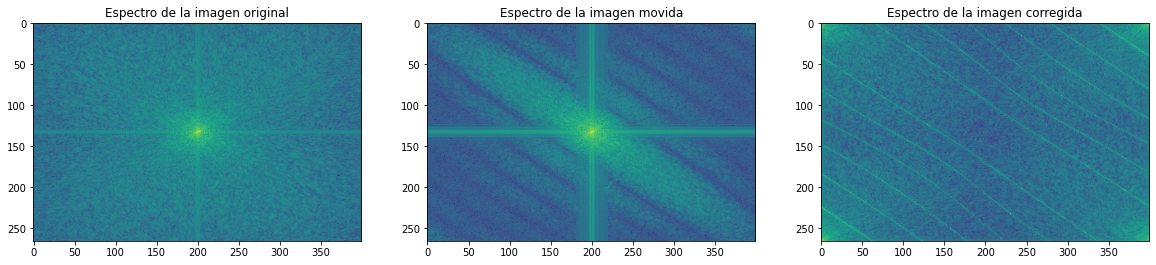

In [96]:
fig, axs = plt.subplots(1,3,figsize=(20,20))


axs[0].imshow(20*np.log10(abs(espectro_I)))
axs[0].set_title('Espectro de la imagen original')
axs[1].imshow(20*np.log10(abs(espectro_I_movida)))
axs[1].set_title('Espectro de la imagen movida')
axs[2].imshow(20*np.log10(abs(espectro_J)))
axs[2].set_title('Espectro de la imagen corregida')



Text(0.5, 1.0, 'Imagen corregida')

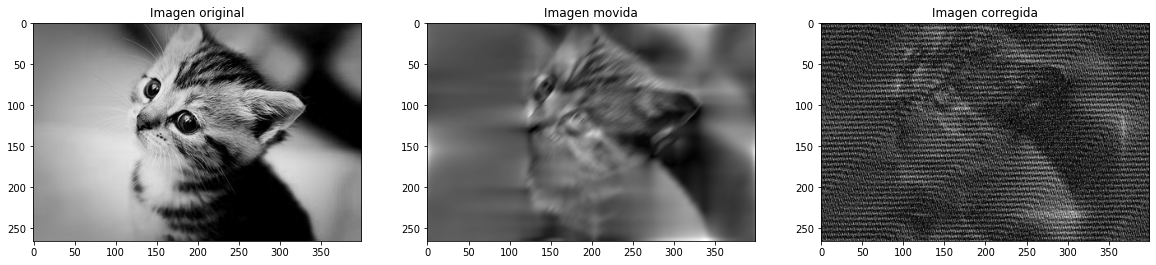

In [97]:
fig, axs = plt.subplots(1,3,figsize=(20,20))


axs[0].imshow(I,cmap='gray')
axs[0].set_title('Imagen original')
axs[1].imshow(I_movida,cmap='gray')
axs[1].set_title('Imagen movida')
axs[2].imshow(J,cmap='gray')
axs[2].set_title('Imagen corregida')

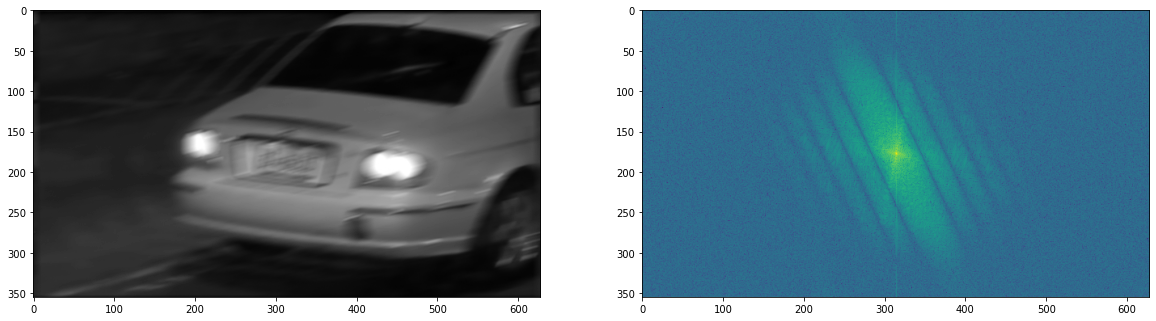

In [54]:
#Ahora con una imagen movida de verdad
#A = motionPSF(9, 45)
filenames = ['./imagenes/blurred1.png']

I = cv2.imread(filenames[0])
I=I[:,:,0]
espectro_I=fft2(I)
espectro_I=fftshift(espectro_I)

#I_conv=convolve(I,A)

fig, axs = plt.subplots(1,2,figsize=(20,20))


axs[0].imshow(I,cmap="gray")
axs[1].imshow(20*np.log10(abs(espectro_I)))


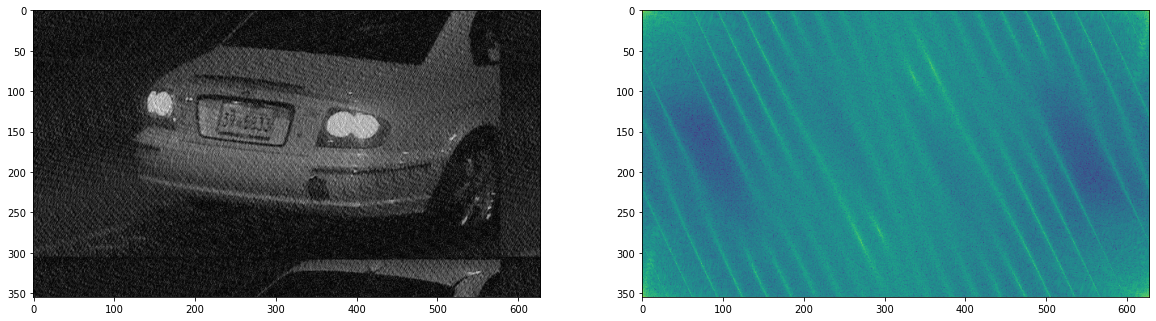

In [55]:
A = motionPSF(20, 15,100)
J, espectro_J, G=filtrado_inverso(I,A)

fig, axs = plt.subplots(1,2,figsize=(20,20))


axs[0].imshow(J,cmap="gray")
axs[1].imshow(20*np.log10(abs(espectro_J)))



d) (Opcional) Fiji: Utilice el algoritmo Richardson-Lucy para intentar restaurar las imágenes de la parte anterior. Compare los resultados obtenidos con los métodos antes evaluados.

Se sugiere usar el [plugin DeconvolutionLab2](http://bigwww.epfl.ch/deconvolution/deconvolutionlab2/) de Fiji. La instalación es análoga a la del plugin SNR.

En el artículo de referencia se muestran los diferentes algoritmos del plugin y los métodos usados para la deconvolución.